In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)


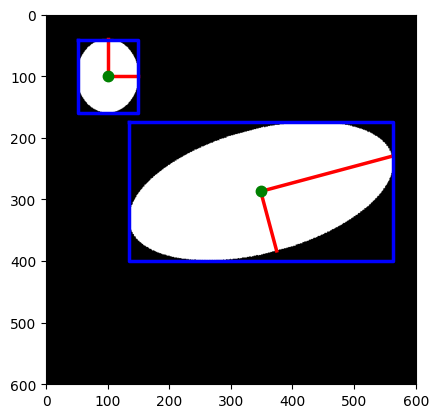

In [6]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

In [57]:
import os
image_path = '/home/nli31/github/nanli-emory/HistoQC/histoqc_output_20240508-154020/PC_227_2_1.svs/PC_227_2_1.svs_mask_use.png'
img = imread(image_path)
print(type(img))
label_img = label(img)
regions = regionprops(label_img)
print(len(regions))
for props in regions:
    print(props.area)
# tables = regionprops_table(label_img, properties = properties)
# tables = regionprops_table(
#     label_img,
#     properties=('area','area_bbox','axis_major_length' )
# )
# pd.DataFrame(tables)
# r = regions[0]
# lst = [attr for attr in dir(r)]
# print(lst)



<class 'numpy.ndarray'>
3
5547737.0
29131.0
20879.0


In [54]:
num = 1
min_area = 10
max_area = 100
mean_area = 50

d = {'num': num, 'min_area': min_area, 'max_area': max_area, 'mean_area': mean_area}
print(d)
x,y,z,e = d.values()
print(x,y,z,e)
print(type(d))


{'num': 1, 'min_area': 10, 'max_area': 100, 'mean_area': 50}
1 10 100 50
<class 'dict'>


In [48]:
import random
d = [random.randint(0, 100) for i in range(10)]
print(d)
[e for e in d if e > 50]

[90, 99, 10, 10, 63, 4, 42, 72, 91, 97]


[90, 99, 63, 72, 91, 97]